# Micro-Credit Defaulter Project

Problem Statement: 

A Microfinance Institution (MFI) is an organization that offers financial services to low income populations. MFS becomes very useful when targeting especially the unbanked poor families living in remote areas with not much sources of income. The Microfinance services (MFS) provided by MFI are Group Loans, Agricultural Loans, Individual Business Loans and so on. 
Many microfinance institutions (MFI), experts and donors are supporting the idea of using mobile financial services (MFS) which they feel are more convenient and efficient, and cost saving, than the traditional high-touch model used since long for the purpose of delivering microfinance services. Though, the MFI industry is primarily focusing on low income families and are very useful in such areas, the implementation of MFS has been uneven with both significant challenges and successes.

Today, microfinance is widely accepted as a poverty-reduction tool, representing $70 billion in outstanding loans and a global outreach of 200 million clients.

We are working with one such client that is in Telecom Industry. They are a fixed wireless telecommunications network provider. They have launched various products and have developed its business and organization based on the budget operator model, offering better products at Lower Prices to all value conscious customers through a strategy of disruptive innovation that focuses on the subscriber. 

They understand the importance of communication and how it affects a person’s life, thus, focusing on providing their services and products to low income families and poor customers that can help them in the need of hour. 

They are collaborating with an MFI to provide micro-credit on mobile balances to be paid back in 5 days. The Consumer is believed to be defaulter if he deviates from the path of paying back the loaned amount within the time duration of 5 days. For the loan amount of 5 (in Indonesian Rupiah), payback amount should be 6 (in Indonesian Rupiah), while, for the loan amount of 10 (in Indonesian Rupiah), the payback amount should be 12 (in Indonesian Rupiah). 

The sample data is provided to us from our client database. In order to improve the selection of customers for the credit, the client wants some predictions that could help them in further investment and improvement in selection of customers. 

The target is to build a model which can be used to predict in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan. In this case, Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter, while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter.  


In [1]:
#Importing imoprttant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the dataset
df=pd.read_csv('Micro_Credit_Loan_Data.csv')

In [3]:
df.head()

Unnamed: 0  label       msisdn    aon  daily_decr30  daily_decr90  \
0           1      0  21408I70789  272.0   3055.050000   3065.150000   
1           2      1  76462I70374  712.0  12122.000000  12124.750000   
2           3      1  17943I70372  535.0   1398.000000   1398.000000   
3           4      1  55773I70781  241.0     21.228000     21.228000   
4           5      1  03813I82730  947.0    150.619333    150.619333   

   rental30  rental90  last_rech_date_ma  last_rech_date_da  ...  \
0    220.13    260.13                2.0                0.0  ...   
1   3691.26   3691.26               20.0                0.0  ...   
2    900.13    900.13                3.0                0.0  ...   
3    159.42    159.42               41.0                0.0  ...   
4   1098.90   1098.90                4.0                0.0  ...   

   maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0              6.0                 0.0          2.0            12   
1             12.0                 0.0          1.0            12   
2              6.0                 0.0          1.0             6   
3              6.0                 0.0          2.0            12   
4              6.0                 0.0          7.0            42   

   maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
0                6                 0.0  29.000000  29.000000      UPW   
1               12                 0.0   0.000000   0.000000      UPW   
2                6                 0.0   0.000000   0.000000      UPW   
3                6                 0.0   0.000000   0.000000      UPW   
4                6                 0.0   2.333333   2.333333      UPW   

        pdate  
0  2016-07-20  
1  2016-08-10  
2  2016-08-19  
3  2016-06-06  
4  2016-06-22  

[5 rows x 37 columns]

In [4]:
#cheking shape of the dataset
df.shape

(209593, 37)

We have 209593 rows and 37 columns.

In [5]:
#cheking column names
df.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [6]:
#Importing description file to show the description of each column
col_data=pd.read_excel('Data_Desc.xlsx', sheet_name='Description')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns',None)
pd.set_option('display.max_colwidth', None)
col_desc = col_data.style.set_properties(**{'text-align': 'left'})
col_desc

Here 'label' is the target variable and all others are independent variables.

Unnamed: 0 - it just have the serial number, therefore it will be deleted.

In [7]:
#Removing Unnamed:0  column
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [8]:
#Checking data type
df.dtypes

label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_loans90           int64
medianam

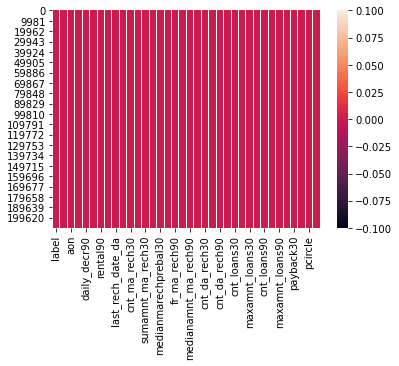

In [9]:
#Checking for null values
sns.heatmap(df.isnull())

In [10]:
df.isnull().sum()

label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

There are no null values in the dataset.

# Visualization:

In [11]:
#Checking the target variable
df.label.value_counts()

1    183431
0     26162
Name: label, dtype: int64

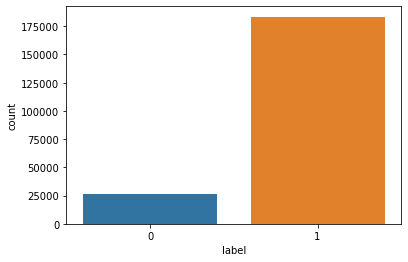

In [12]:
sns.countplot(df.label)

The dataset is imbalanced. Label ‘1’ has approximately 87.5% records, while, label ‘0’ has approximately 12.5% records.

87.5% of customers have paid their loan and 12.5% of customers did not.

In [13]:
#visualizing columns having object data type
len(df.msisdn.unique())

186243

msisdn is the mobile number of the users.

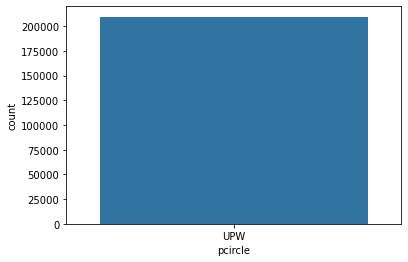

In [14]:
sns.countplot(df.pcircle)

Telecom circle is same for all the users in the dataset.

According to the description of the dataset, there is not enough information regarding pdate, we don't know which date it indicates.

I'll be removing columns ('msisdn','pcircel' and 'pdate'), as they don't contribute in predicting the target variable.

In [15]:
df.drop(['msisdn','pcircle','pdate'],axis=1,inplace=True)

In [16]:
df.dtypes

label                     int64
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_loans90           int64
medianamnt_loans90      float64
payback3

Now we are left with numerical data only.

In [17]:
#Describing the data
df.describe()

label            aon   daily_decr30   daily_decr90  \
count  209593.000000  209593.000000  209593.000000  209593.000000   
mean        0.875177    8112.343445    5381.402289    6082.515068   
std         0.330519   75696.082531    9220.623400   10918.812767   
min         0.000000     -48.000000     -93.012667     -93.012667   
25%         1.000000     246.000000      42.440000      42.692000   
50%         1.000000     527.000000    1469.175667    1500.000000   
75%         1.000000     982.000000    7244.000000    7802.790000   
max         1.000000  999860.755168  265926.000000  320630.000000   

            rental30       rental90  last_rech_date_ma  last_rech_date_da  \
count  209593.000000  209593.000000      209593.000000      209593.000000   
mean     2692.581910    3483.406534        3755.847800        3712.202921   
std      4308.586781    5770.461279       53905.892230       53374.833430   
min    -23737.140000  -24720.580000         -29.000000         -29.000000   
25%       280.420000     300.260000           1.000000           0.000000   
50%      1083.570000    1334.000000           3.000000           0.000000   
75%      3356.940000    4201.790000           7.000000           0.000000   
max    198926.110000  200148.110000      998650.377733      999171.809410   

       last_rech_amt_ma  cnt_ma_rech30   fr_ma_rech30  sumamnt_ma_rech30  \
count     209593.000000  209593.000000  209593.000000      209593.000000   
mean        2064.452797       3.978057    3737.355121        7704.501157   
std         2370.786034       4.256090   53643.625172       10139.621714   
min            0.000000       0.000000       0.000000           0.000000   
25%          770.000000       1.000000       0.000000        1540.000000   
50%         1539.000000       3.000000       2.000000        4628.000000   
75%         2309.000000       5.000000       6.000000       10010.000000   
max        55000.000000     203.000000  999606.368132      810096.000000   

       medianamnt_ma_rech30  medianmarechprebal30  cnt_ma_rech90  \
count         209593.000000         209593.000000   209593.00000   
mean            1812.817952           3851.927942        6.31543   
std             2070.864620          54006.374433        7.19347   
min                0.000000           -200.000000        0.00000   
25%              770.000000             11.000000        2.00000   
50%             1539.000000             33.900000        4.00000   
75%             1924.000000             83.000000        8.00000   
max            55000.000000         999479.419319      336.00000   

        fr_ma_rech90  sumamnt_ma_rech90  medianamnt_ma_rech90  \
count  209593.000000      209593.000000         209593.000000   
mean        7.716780       12396.218352           1864.595821   
std        12.590251       16857.793882           2081.680664   
min         0.000000           0.000000              0.000000   
25%         0.000000        2317.000000            773.000000   
50%         2.000000        7226.000000           1539.000000   
75%         8.000000       16000.000000           1924.000000   
max        88.000000      953036.000000          55000.000000   

       medianmarechprebal90  cnt_da_rech30   fr_da_rech30  cnt_da_rech90  \
count         209593.000000  209593.000000  209593.000000  209593.000000   
mean              92.025541     262.578110    3749.494447       0.041495   
std              369.215658    4183.897978   53885.414979       0.397556   
min             -200.000000       0.000000       0.000000       0.000000   
25%               14.600000       0.000000       0.000000       0.000000   
50%               36.000000       0.000000       0.000000       0.000000   
75%               79.310000       0.000000       0.000000       0.000000   
max            41456.500000   99914.441420  999809.240107      38.000000   

        fr_da_rech90    cnt_loans30   amnt_loans30  maxamnt_loans30  \
count  209593.000000  209593.000000  209593.000000    20959

Observations:

1.There is a huge difference between 75% and max in most of the columns, it means that the data is skewed and outliers are present in our dataset.

2.There are negative values in aon,last_rech_date_ma and last_rech_date_da which seems to be unrealistic as these columns indicates no. of days which can't be negative.

3.Standard deviation is very huge in the columns, it means that data is widely spreaded.

4.Minimum value is either 0 or negative in all the columns.


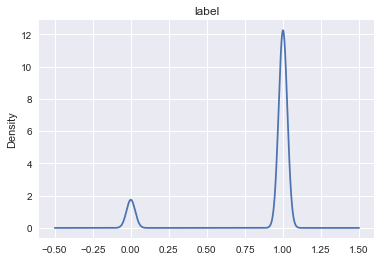

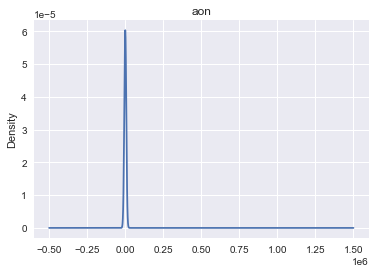

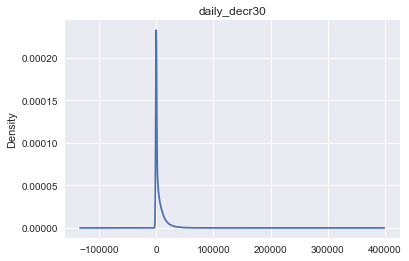

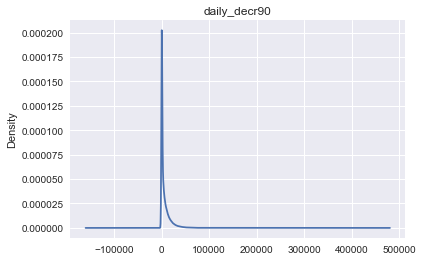

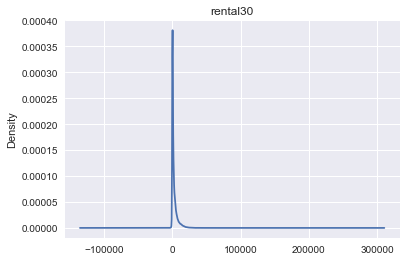

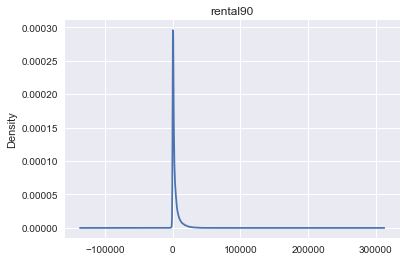

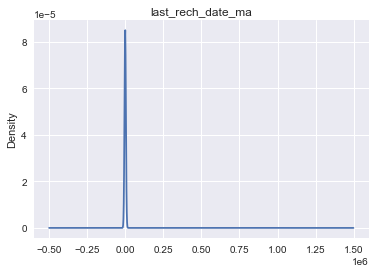

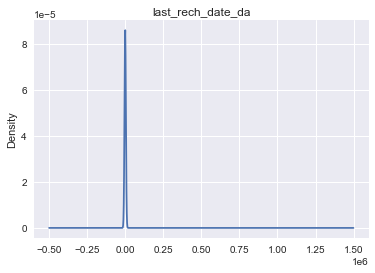

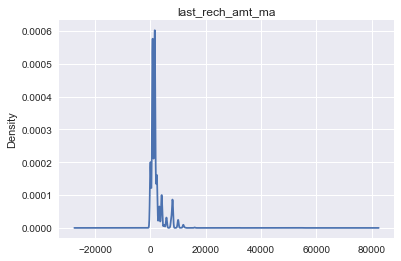

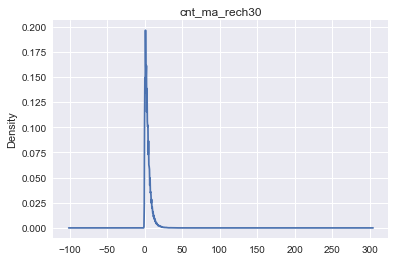

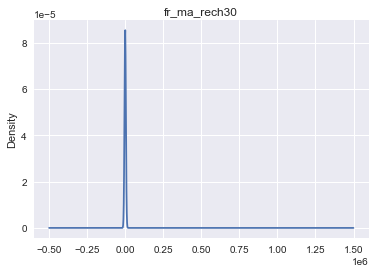

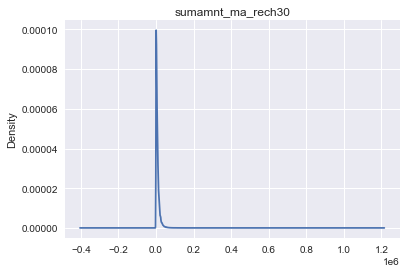

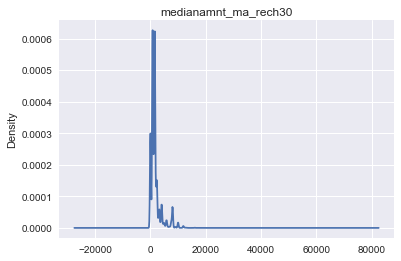

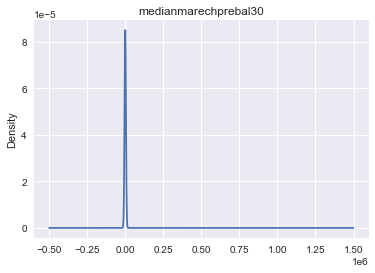

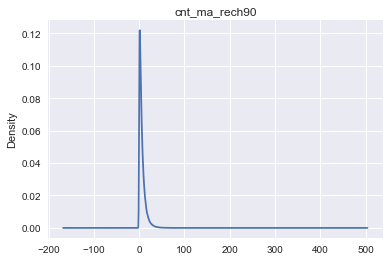

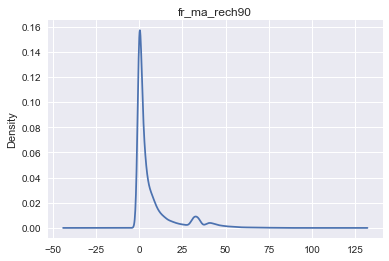

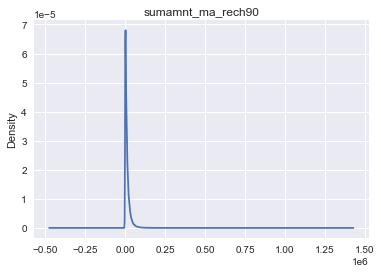

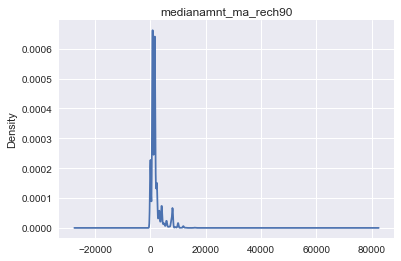

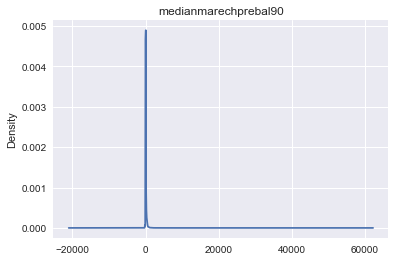

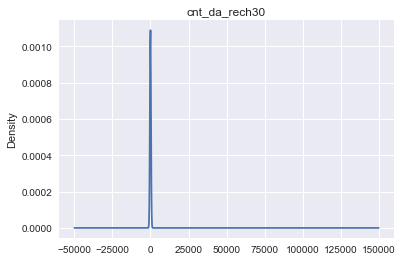

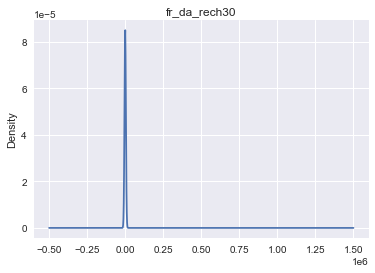

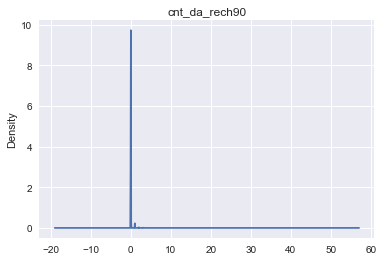

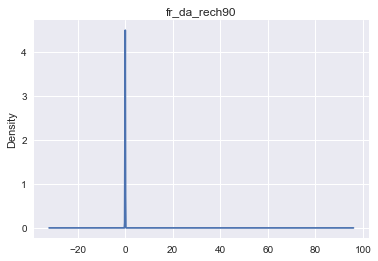

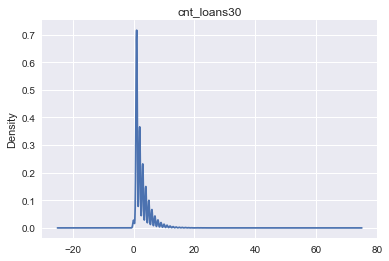

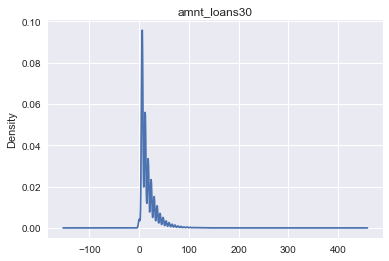

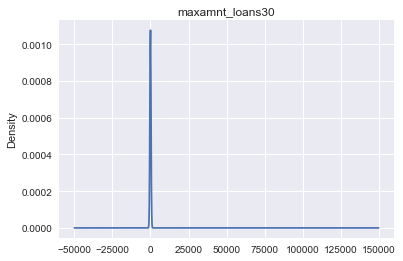

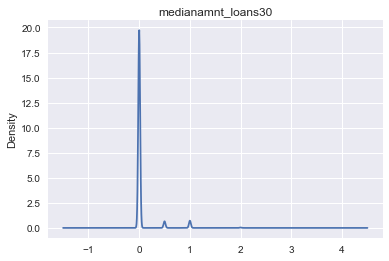

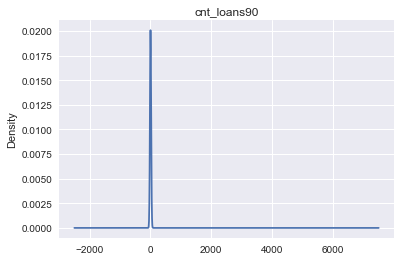

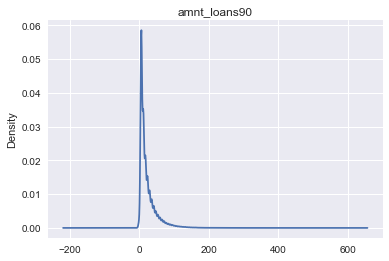

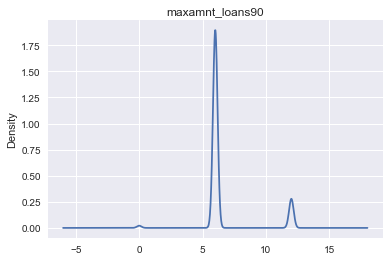

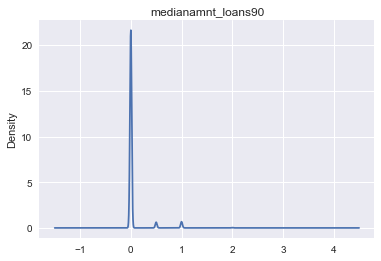

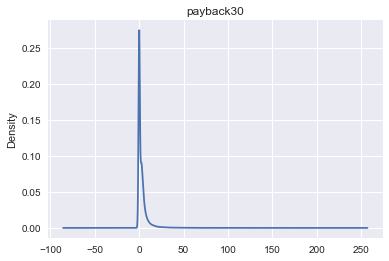

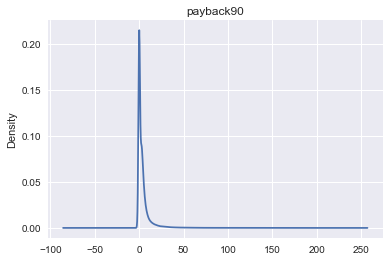

In [30]:
#Lets see the distribution af all columns using density graph.
for i in df.columns:
    df[i].plot(kind='density')
    plt.title(i)
    plt.show()

Almost all the independent variables are right skewed.

In [18]:
#Converting negative values to positive in aon,last_rech_date_ma and last_rech_date_da as they can't have negative values in them, it might be a human error.
col=['aon','last_rech_date_ma','last_rech_date_da']
for i in col:
    df[i]=abs(df[i])

In [19]:
df.describe()

label            aon   daily_decr30   daily_decr90  \
count  209593.000000  209593.000000  209593.000000  209593.000000   
mean        0.875177    8112.808718    5381.402289    6082.515068   
std         0.330519   75696.032666    9220.623400   10918.812767   
min         0.000000       1.000000     -93.012667     -93.012667   
25%         1.000000     246.000000      42.440000      42.692000   
50%         1.000000     527.000000    1469.175667    1500.000000   
75%         1.000000     982.000000    7244.000000    7802.790000   
max         1.000000  999860.755168  265926.000000  320630.000000   

            rental30       rental90  last_rech_date_ma  last_rech_date_da  \
count  209593.000000  209593.000000      209593.000000      209593.000000   
mean     2692.581910    3483.406534        3756.125844        3712.204801   
std      4308.586781    5770.461279       53905.872857       53374.833299   
min    -23737.140000  -24720.580000           0.000000           0.000000   
25%       280.420000     300.260000           1.000000           0.000000   
50%      1083.570000    1334.000000           3.000000           0.000000   
75%      3356.940000    4201.790000           7.000000           0.000000   
max    198926.110000  200148.110000      998650.377733      999171.809410   

       last_rech_amt_ma  cnt_ma_rech30   fr_ma_rech30  sumamnt_ma_rech30  \
count     209593.000000  209593.000000  209593.000000      209593.000000   
mean        2064.452797       3.978057    3737.355121        7704.501157   
std         2370.786034       4.256090   53643.625172       10139.621714   
min            0.000000       0.000000       0.000000           0.000000   
25%          770.000000       1.000000       0.000000        1540.000000   
50%         1539.000000       3.000000       2.000000        4628.000000   
75%         2309.000000       5.000000       6.000000       10010.000000   
max        55000.000000     203.000000  999606.368132      810096.000000   

       medianamnt_ma_rech30  medianmarechprebal30  cnt_ma_rech90  \
count         209593.000000         209593.000000   209593.00000   
mean            1812.817952           3851.927942        6.31543   
std             2070.864620          54006.374433        7.19347   
min                0.000000           -200.000000        0.00000   
25%              770.000000             11.000000        2.00000   
50%             1539.000000             33.900000        4.00000   
75%             1924.000000             83.000000        8.00000   
max            55000.000000         999479.419319      336.00000   

        fr_ma_rech90  sumamnt_ma_rech90  medianamnt_ma_rech90  \
count  209593.000000      209593.000000         209593.000000   
mean        7.716780       12396.218352           1864.595821   
std        12.590251       16857.793882           2081.680664   
min         0.000000           0.000000              0.000000   
25%         0.000000        2317.000000            773.000000   
50%         2.000000        7226.000000           1539.000000   
75%         8.000000       16000.000000           1924.000000   
max        88.000000      953036.000000          55000.000000   

       medianmarechprebal90  cnt_da_rech30   fr_da_rech30  cnt_da_rech90  \
count         209593.000000  209593.000000  209593.000000  209593.000000   
mean              92.025541     262.578110    3749.494447       0.041495   
std              369.215658    4183.897978   53885.414979       0.397556   
min             -200.000000       0.000000       0.000000       0.000000   
25%               14.600000       0.000000       0.000000       0.000000   
50%               36.000000       0.000000       0.000000       0.000000   
75%               79.310000       0.000000       0.000000       0.000000   
max            41456.500000   99914.441420  999809.240107      38.000000   

        fr_da_rech90    cnt_loans30   amnt_loans30  maxamnt_loans30  \
count  209593.000000  209593.000000  209593.000000    20959

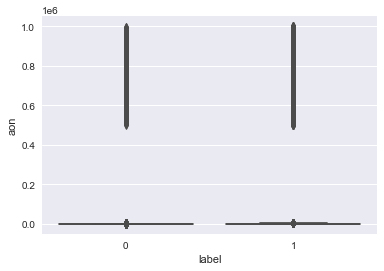

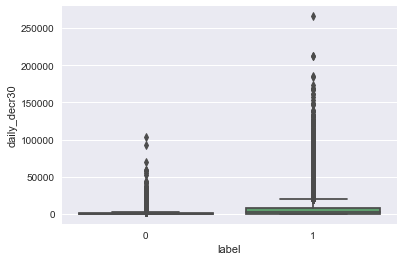

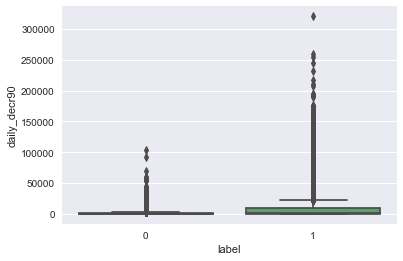

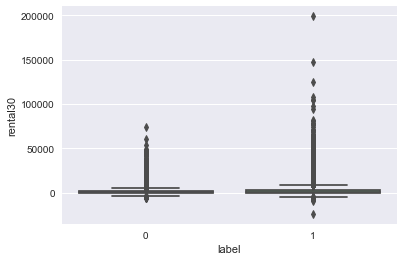

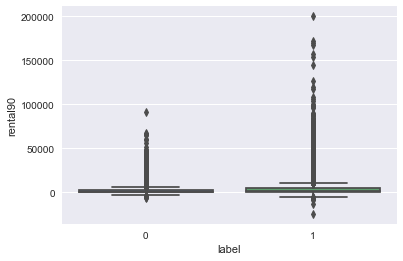

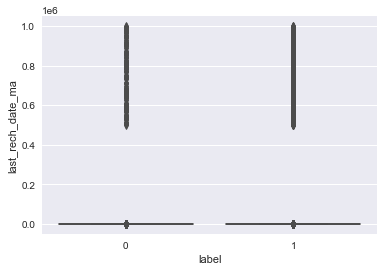

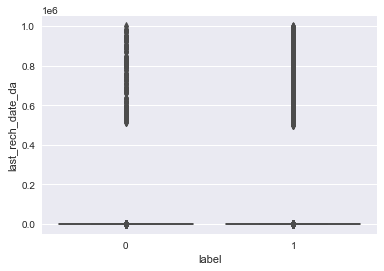

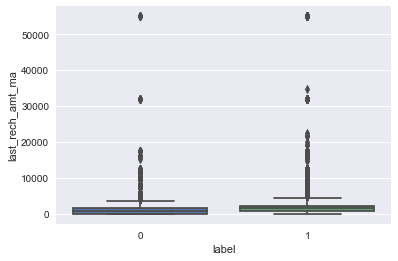

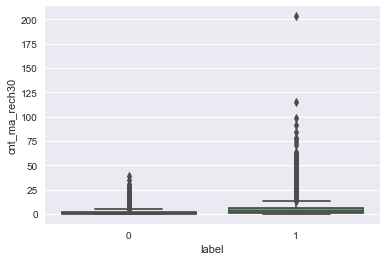

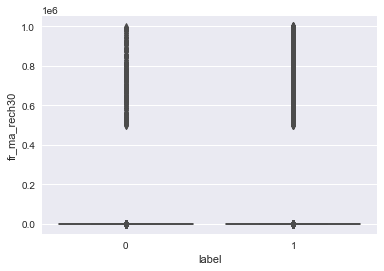

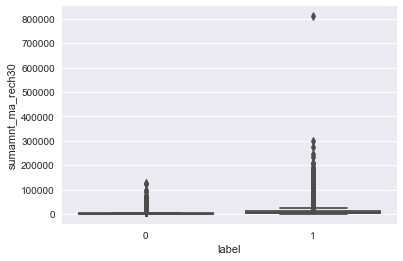

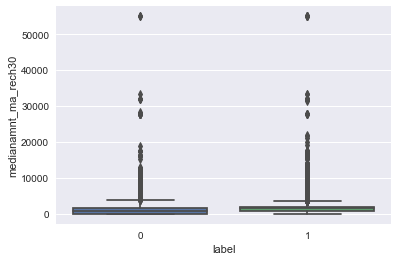

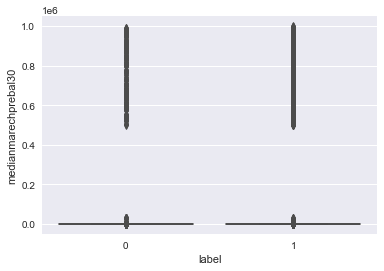

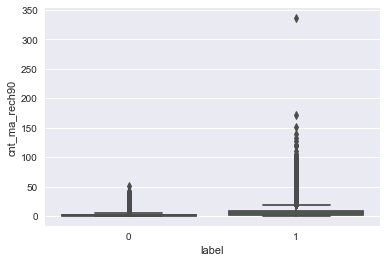

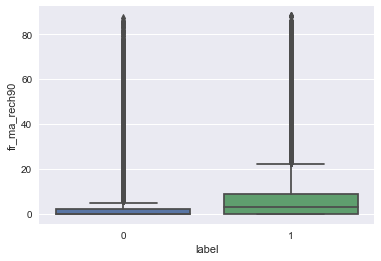

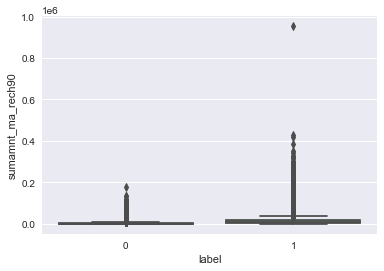

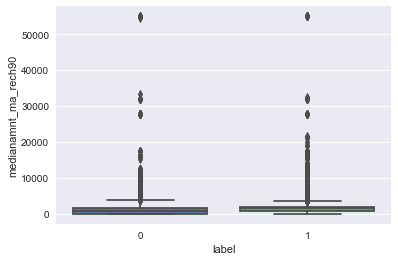

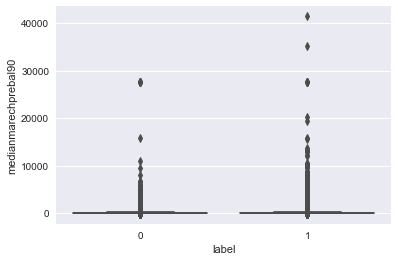

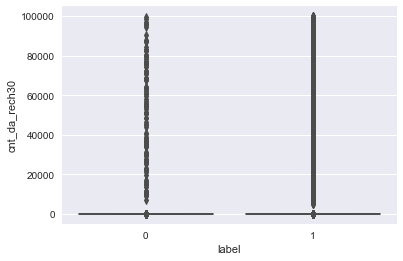

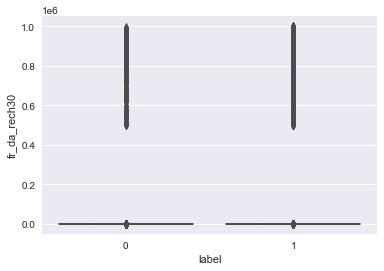

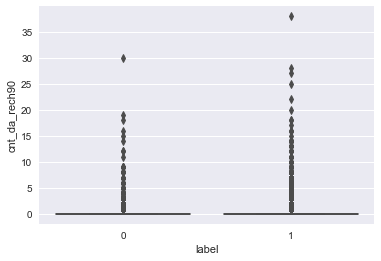

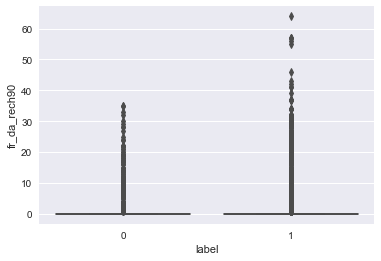

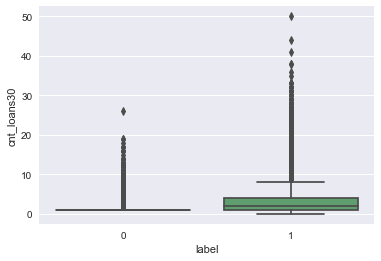

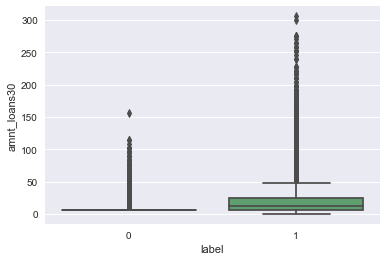

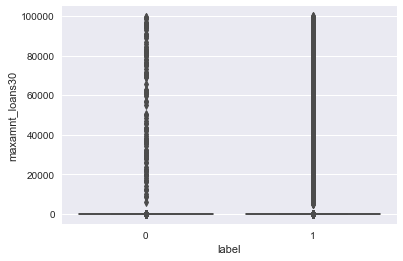

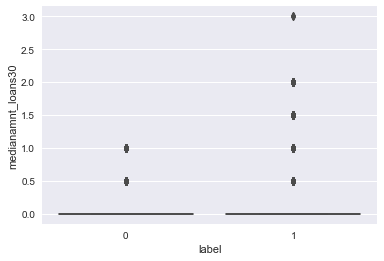

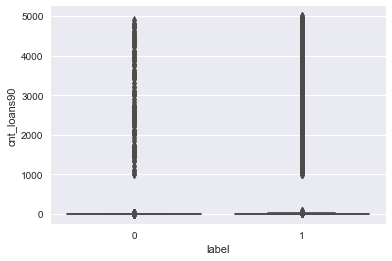

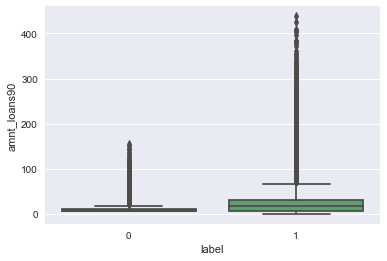

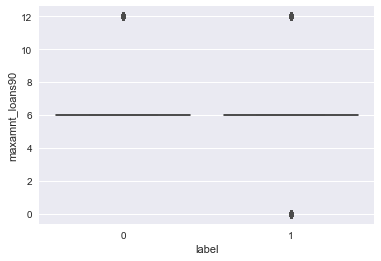

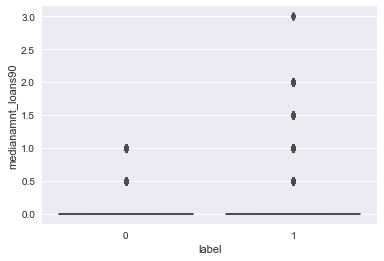

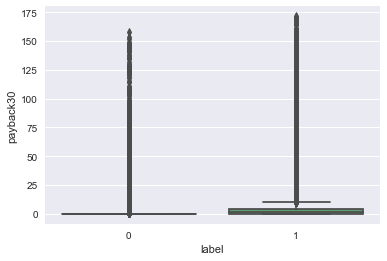

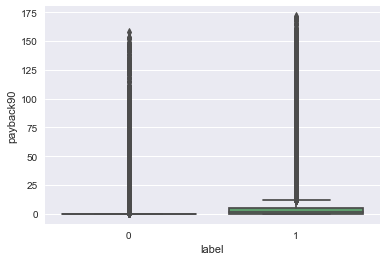

In [73]:
#Checking effect of independent variables on target variable
for i in df.iloc[:,1:].columns:
    sns.boxplot(df['label'],df[i])
    plt.show()

The variables     (aon,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,fr_ma_rech30,fr_ma_rech90,,medianamnt_ma_rech30,medianmarechprebal30,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,maxamnt_loans30,cnt_loans90,maxamnt_loans90,payback30,payback90) doen't have much effect on predicting whether a customer will pay the loan within the time-limit or not.

The customers who have large value in the columns (daily_decr30,daily_decr90,rental30,rental90,cnt_amt_rech30,sumamnt_ma_rech30,cnt_ma_rech90,sumamnt_ma_rech90,fr_da_reh90,cnt_loans30,amnt_loans30,medianamnt_loans30,amnt_loans90,medianamnt_loans90) tends to pay the loan within the time limit(5 days).


In [ ]:
#Now I'll group some of the columns into categories and then compare them with the target variable.

In [20]:
#Grouping rental 30 (average main account balance over last 30 days) into no, low, medium and high balance
lst=[df]
for column in lst:
    column.loc[column["rental30"] <= 0,'balance_group']='no balance'
    column.loc[(column["rental30"] > 0) & (column["rental30"] <= 19766),'balance_group']='low balance'
    column.loc[(column["rental30"] > 19766) & (column["rental30"] <= 118572),'balance_group']='medium balance'
    column.loc[(column["rental30"] > 118572),'balance_group']='high balance'

In [21]:
#creating crosstable of balance_group and target variable
crosstab_bal=pd.crosstab(df['label'],df['balance_group']).apply(lambda x:x/x.sum()*100)
crosstab_bal=crosstab_bal.transpose()


In [22]:
crosstab_bal

label                   0           1
balance_group                        
high balance     0.000000  100.000000
low balance     11.276328   88.723672
medium balance   9.436834   90.563166
no balance      30.710929   69.289071

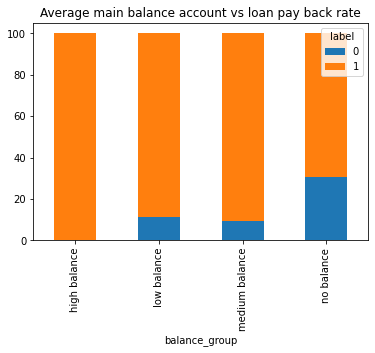

In [23]:
crosstab_bal.plot.bar(stacked=True)
plt.title('Average main balance account vs loan pay back rate')
plt.show()

The above bar plot and cross-table shows how customers with different main balance levels are paying back the loan with in five days. 

The high balance level users are with 100% rate i.e they are paying loan within 5 days.

Coming to the average and low balance users it is observed that around 10%-12% of them are not paying the loan within 5 days.

Coming to no balance or negative balance users, it is observed that around 30% of them are not paying back the loan with in 5 days.

In [24]:
#Grouping fr_ma_rech30 (Frequency of main account recharged in last 30 days) into no, low, medium and high frequency
lst=[df]
for column in lst:
    column.loc[column["fr_ma_rech30"] <=0,'frequency_group']='no frequency'
    column.loc[(column['fr_ma_rech30'] > 0) & (column['fr_ma_rech30'] <=1 ),'frequency_group']='low frequency'
    column.loc[(column['fr_ma_rech30'] >1) & (column['fr_ma_rech30'] <=2),'frequency_group']='medium frequency'
    column.loc[(column['fr_ma_rech30'] >2),'frequency_group']='high frequency'
    
#Creating crosstable of frequency_group and target variable    
crosstab_fr = pd.crosstab(df['label'],df['frequency_group']).apply(lambda x:x/x.sum()*100)
crosstab_fr = crosstab_fr.transpose()
crosstab_fr

label                     0          1
frequency_group                       
high frequency     5.481040  94.518960
low frequency      4.304873  95.695127
medium frequency   3.787999  96.212001
no frequency      24.870684  75.129316

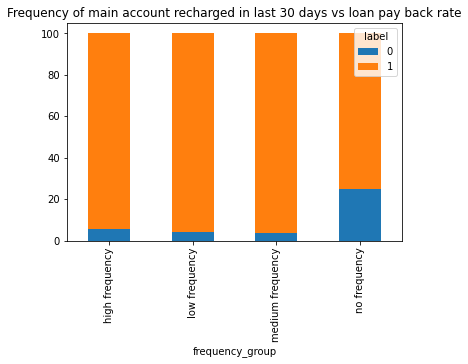

In [25]:
crosstab_fr.plot.bar(stacked=True)
plt.title('Frequency of main account recharged in last 30 days vs loan pay back rate')
plt.show()

The above bar plot and cross-table shows us how customers with different frequency levels (main account recharge) are paying back the loan within five days. The is no 100% rate in any of the frequency levels to pay back the loan within 5 days.

It is observed that around 5%-6% of people with low & medium frequency are not paying the loan within 5 days.

Coming to no frequency level people, it is observed that around 25% of people are not paying back the loan within 5 days.

In [26]:
#Grouping cnt_loans30 (Number of loans taken by user in last 30 days) into no, low, medium and high number of loans
lst = [df]
for column in lst:
    column.loc[column["cnt_loans30"] <=0,'loan_frequency_group']='no loans'
    column.loc[(column['cnt_loans30'] > 0) & (column['cnt_loans30']<=1 ),'loan_frequency_group']='low num of loans'
    column.loc[(column['cnt_loans30'] >1) & (column['cnt_loans30']<=4),'loan_frequency_group']='medium num of loans'
    column.loc[(column['cnt_loans30'] >4),'loan_frequency_group']='high num of loans'

#creating crosstable
crosstab_loan_fr=pd.crosstab(df['label'],df['loan_frequency_group']).apply(lambda x: x/x.sum()*100)
crosstab_loan_fr=crosstab_loan_fr.transpose()
crosstab_loan_fr

label                         0           1
loan_frequency_group                       
high num of loans      1.619592   98.380408
low num of loans      23.972816   76.027184
medium num of loans    6.401495   93.598505
no loans               0.000000  100.000000

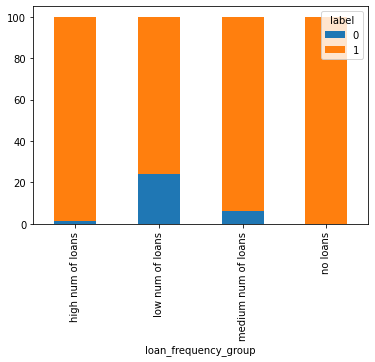

In [27]:
crosstab_loan_fr.plot.bar(stacked=True)

The above bar plot and cross-table shows us how customers with different loans levels taken are paying back the loan within 5 days. In the dataset users who have not taken loans are labelled as ‘1’. So I'll not not consider the people with no loans labelled in the above graph.

Considering the remaining levels, there is no 100% rate in any of the loan levels to pay back the loan within 5 days. 

Coming to the high number of loan level users it is observed that around 25% of users are not paying the loan within 5 days. 

Only 2% of the people from low number of loans category are not paying the loan within 5 days.

Coming to medium number of loan level users, it is observed that around 7% of users have not payed the loan within 5 days.



In [28]:
#Grouping cnt_loans30 (Total amount of loans taken by user in last 30 days) into no, low, medium and high amnt of loans
lst = [df]
for column in lst:
    column.loc[column["amnt_loans30"]<=0,'loanamnt_frequency_group']='no loans'
    column.loc[(column['amnt_loans30'] > 0) & (column['amnt_loans30'] <=6),'loanamnt_frequency_group']='low amnt of loans'
    column.loc[(column['amnt_loans30'] >6) & (column['amnt_loans30'] <=24),'loanamnt_frequency_group']='medium amnt of loans'
    column.loc[(column['amnt_loans30'] >24),'loanamnt_frequency_group']='high amnt of loans'

#creating crosstable
crosstab_loanamnt = pd.crosstab(df['label'],df['loanamnt_frequency_group']).apply(lambda x:x/x.sum()*100)
crosstab_loanamnt= crosstab_loanamnt.transpose()
crosstab_loanamnt

label                             0           1
loanamnt_frequency_group                       
high amnt of loans         1.736214   98.263786
low amnt of loans         25.652571   74.347429
medium amnt of loans       6.508086   93.491914
no loans                   0.000000  100.000000

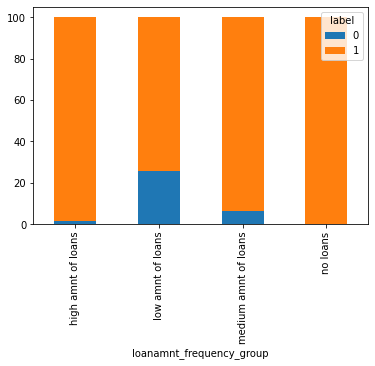

In [29]:
crosstab_loanamnt.plot.bar(stacked=True)

The above bar plot and cross-table shows us how customers with different loans levels taken are paying back the loan within five days. In the data set people not taken loans are labelled as ‘1’. So we should not consider the people with no loans labelled in the above graph.

The results are almost same as we got while comparing cnt_loans30 with the target variable.

There is no 100% rate in any of the loan levels to pay back the loan within 5 days.

Coming to the low amount level users it is observed that around 25% of users are not paying the loan within 5 days.

Only 2% of the users who have taken high amount of loans are not paying the loan within 5 days,followed by the users with medium number of loans having defaulters of 7% approximately.

In [30]:
#Removing the extra columns created in the above steps
df.drop(['balance_group','frequency_group','loan_frequency_group','loanamnt_frequency_group'],axis=1,inplace=True)

In [31]:
#Checking correlation 
corr=df.corr()
corr['label'].sort_values(ascending=False)

label                   1.000000
cnt_ma_rech30           0.237331
cnt_ma_rech90           0.236392
sumamnt_ma_rech90       0.205793
sumamnt_ma_rech30       0.202828
amnt_loans90            0.199788
amnt_loans30            0.197272
cnt_loans30             0.196283
daily_decr30            0.168298
daily_decr90            0.166150
medianamnt_ma_rech30    0.141490
last_rech_amt_ma        0.131804
medianamnt_ma_rech90    0.120855
fr_ma_rech90            0.084385
maxamnt_loans90         0.084144
rental90                0.075521
rental30                0.058085
payback90               0.049183
payback30               0.048336
medianamnt_loans30      0.044589
medianmarechprebal90    0.039300
medianamnt_loans90      0.035747
cnt_loans90             0.004733
cnt_da_rech30           0.003827
last_rech_date_ma       0.003730
cnt_da_rech90           0.002999
last_rech_date_da       0.001711
fr_ma_rech30            0.001330
maxamnt_loans30         0.000248
fr_da_rech30           -0.000027
aon       

No variable is strongly correlated with the target variable.

In [32]:
#Checking outliers using z-score
from scipy.stats import zscore
import numpy as np
zscr=np.abs(zscore(df))
threshold=3
print(np.where(zscr>3))

(array([    21,     22,     22, ..., 209586, 209587, 209587], dtype=int64), array([15, 15, 32, ..., 28, 26, 30], dtype=int64))


In [33]:
#Removing outliers
print('shape before removing the outliers:' , df.shape)
df_new=df[(zscr<3).all(axis=1)]
print('shape after removing outliers :',df_new.shape)

shape before removing the outliers: (209593, 33)
shape after removing outliers : (161465, 33)


In [34]:
#Calculating data loss after removing outliers
print('data loss =',100-((161465/209593)*100))

data loss = 22.962598941758543


As the data loss is very high in removing the ouliers, therfore I'll replace the ouliers with the median of the respective column.

In [35]:
#Sepearating independent and target variable
x=df.iloc[:,1:]
y=df.iloc[:,0]

In [36]:
#Replacing the outliers with median
columns=x.columns
for i in range(len(columns)):
    x[columns[i]]=zscore(x[columns[i]])
    for j in range(len(x[columns[i]])):
        if x[columns[i]][j]>3 or x[columns[i]][j]<-3:
            x[columns[i]].replace(x[columns[i]][j],x[columns[i]].median(),inplace=True)

In [37]:
#Checking skewness
x.skew()

aon                      0.962517
daily_decr30             1.882403
daily_decr90             2.000510
rental30                 2.016235
rental90                 2.087133
last_rech_date_ma        3.482486
last_rech_date_da        9.704378
last_rech_amt_ma         2.058066
cnt_ma_rech30            1.289233
fr_ma_rech30             2.027734
sumamnt_ma_rech30        1.643991
medianamnt_ma_rech30     2.221773
medianmarechprebal30    39.356789
cnt_ma_rech90            1.443306
fr_ma_rech90             2.080471
sumamnt_ma_rech90        1.733638
medianamnt_ma_rech90     2.252064
medianmarechprebal90     3.616105
cnt_da_rech30           51.802906
fr_da_rech30            31.165066
cnt_da_rech90            6.873643
fr_da_rech90            45.330688
cnt_loans30              1.510614
amnt_loans30             1.541664
maxamnt_loans30         54.393939
medianamnt_loans30       5.393540
cnt_loans90              3.004318
amnt_loans90             1.755924
maxamnt_loans90          2.241299
medianamnt_loa

In [38]:
#applying cuberoot transformation to bring data to a normal distribution
for i in range(len(columns)):
    x[columns[i]]=np.cbrt((x[columns[i]]))

In [39]:
#Checking multicollinearity using VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif['Features']=x.columns
vif['vif']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]

In [40]:
vif[vif['vif']>4]

Features           vif
0                    aon  1.968627e+03
1           daily_decr30  1.249386e+01
2           daily_decr90  1.301448e+01
3               rental30  6.178649e+00
4               rental90  6.724776e+00
5      last_rech_date_ma  1.821597e+06
6      last_rech_date_da  4.407531e+06
8          cnt_ma_rech30  4.509184e+00
9           fr_ma_rech30  6.007200e+06
10     sumamnt_ma_rech30  4.334640e+00
11  medianamnt_ma_rech30  5.761909e+00
12  medianmarechprebal30  2.944079e+02
13         cnt_ma_rech90  4.904571e+00
15     sumamnt_ma_rech90  4.881455e+00
16  medianamnt_ma_rech90  5.515265e+00
18         cnt_da_rech30  1.306647e+02
19          fr_da_rech30  1.252572e+07
20         cnt_da_rech90  6.969247e+00
21          fr_da_rech90  9.372647e+01
22           cnt_loans30  1.011753e+01
23          amnt_loans30  1.225710e+01
24       maxamnt_loans30  1.421642e+02
25    medianamnt_loans30  9.181084e+00
26           cnt_loans90  3.010151e+01
27          amnt_loans90  5.103222e+00
29    medianamnt_loans90  9.698587e+00
30             payback30  4.045494e+00

The above results indicates that the many features are having strong multicollinearity in the data set. This means that there is need to go for PCA (Principal Component Analysis) to reduce the multicollinearity effect among the independent variables, as more than 50% of the features are having vif >4.

In [41]:
#Performing PCA
from sklearn.decomposition import PCA

pca=PCA()
pca.fit(x)

PCA()

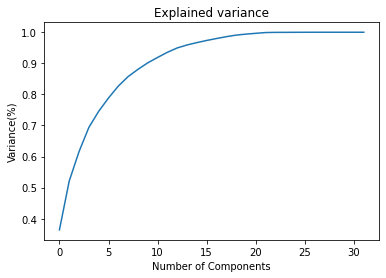

In [42]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance(%)') # for each component
plt.title('Explained variance')
plt.show()

We can see that around 95% of the variance is being explained by 13 components, so I'll be taking total number of PCA components as 13.  

In [43]:
pca=PCA(n_components=13)
pca.fit(x)
new_data=pd.DataFrame(pca.transform(x))
new_data.shape

(209593, 13)

In [44]:
x=new_data

In [45]:
x.shape,y.shape

((209593, 13), (209593,))

In [47]:
#Finding the best random state
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
maxacc=0
maxrs=0
for i in range(1,100):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.30,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    predrf=lr.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxacc:
        maxacc=acc
        maxrs=i
print('Best accuracy is',maxacc,'on random state', maxrs)

Best accuracy is 0.8795604185883775 on random state 32


In [48]:
#Spliting train and test data at random state 32
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=32)

In [49]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((140427, 13), (69166, 13), (140427,), (69166,))

In [51]:
#Importing classification models
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [52]:
lr=LogisticRegression()
gnb=GaussianNB()
rf=RandomForestClassifier()
ada=AdaBoostClassifier()
knn=KNeighborsClassifier()
dtc=DecisionTreeClassifier()

In [53]:
model=[lr,gnb,rf,ada,knn,dtc]
for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print('accuracy score:',m)
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    score=cross_val_score(m, x, y, cv=5)
    print('Cross Validation Score:',score.mean())

accuracy score: LogisticRegression()
0.8788855796200445
[[  293  8249]
 [  128 60496]]
              precision    recall  f1-score   support

           0       0.70      0.03      0.07      8542
           1       0.88      1.00      0.94     60624

    accuracy                           0.88     69166
   macro avg       0.79      0.52      0.50     69166
weighted avg       0.86      0.88      0.83     69166

Cross Validation Score: 0.8770235670917105
accuracy score: GaussianNB()
0.7804846311771679
[[ 5825  2717]
 [12466 48158]]
              precision    recall  f1-score   support

           0       0.32      0.68      0.43      8542
           1       0.95      0.79      0.86     60624

    accuracy                           0.78     69166
   macro avg       0.63      0.74      0.65     69166
weighted avg       0.87      0.78      0.81     69166

Cross Validation Score: 0.7812474866484063
accuracy score: RandomForestClassifier()
0.8993436081311628
[[ 3188  5354]
 [ 1608 59016]]
   

From the above results it is clear that Random Forest Classifier is performing best than all other models in terms of accuracy,precision,recall,f-1 score and cross validation score. Lets see its results individually.

In [57]:
#Printing accuracy score
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print('accuracy score:')
print(accuracy_score(y_test,pred))

accuracy score:
0.8990110748055403


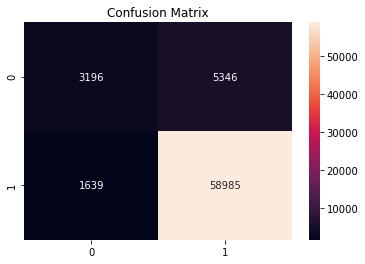

In [58]:
#Plotting confusion matrix
cm=confusion_matrix(y_test,pred)
sns.heatmap(cm,annot=True,fmt='d')
plt.title('Confusion Matrix')
plt.show()

In [59]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
score=cross_val_score(m, x, y, cv=5)
print('Cross Validation Score:',score.mean())

[[ 3196  5346]
 [ 1639 58985]]
              precision    recall  f1-score   support

           0       0.66      0.37      0.48      8542
           1       0.92      0.97      0.94     60624

    accuracy                           0.90     69166
   macro avg       0.79      0.67      0.71     69166
weighted avg       0.89      0.90      0.89     69166

Cross Validation Score: 0.8505102788433614


Results are as follows:

Accuracy:- 90%
Precision:- 92%
Recall:-    97%
F-1 score:- 94%
Cross validation score:- 85%

In [64]:
#Hyper parameter tuning of the best model, in this case:- Random Forest Classifier
from sklearn.model_selection import GridSearchCV

parameters={'n_estimators':[100,300,500],'max_features':['auto','sqrt']}
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'max_features': 'auto', 'n_estimators': 500}


In [65]:
pred=clf.best_estimator_.predict(x_test)

In [66]:
print('accuracy score:')
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
score=cross_val_score(clf.best_estimator_, x, y, cv=5)
print('Cross Validation Score:',score.mean())
print('auc score:',roc_auc_score(y_test,pred))

accuracy score:
0.9000231327530868
[[ 3179  5363]
 [ 1552 59072]]
              precision    recall  f1-score   support

           0       0.67      0.37      0.48      8542
           1       0.92      0.97      0.94     60624

    accuracy                           0.90     69166
   macro avg       0.79      0.67      0.71     69166
weighted avg       0.89      0.90      0.89     69166

Cross Validation Score: 0.8998630725078577
auc score: 0.673280332060811


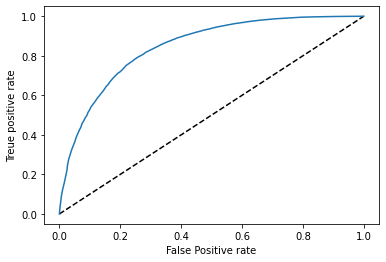

In [67]:
#PLotting auc_roc curve
y_pred_prob=clf.best_estimator_.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Random Forest classifier')
plt.xlabel('False Positive rate')
plt.ylabel('Treue positive rate')
plt.show()

The area under the curve shows that our model is good.

Results of the final model are as follows:
    
Accuracy:- 90%

Precision:- 92%

Recall:-    97%

F-1 score:- 94%

Cross validation score:- 89%

auc_roc score:- 67%

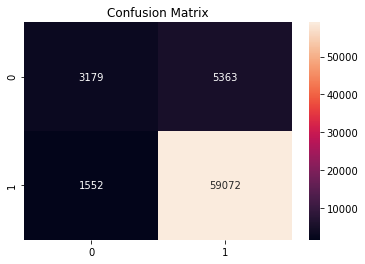

In [68]:
#Confusion matrix of the final model
cm=confusion_matrix(y_test,pred)
sns.heatmap(cm,annot=True,fmt='d')
plt.title('Confusion Matrix')
plt.show()

Total no. of test results were 69,166. Our model is able to detect the following:

True Positive=59,072

True Negative=3179

False Positive=1552 (type-1 error)

False Negative=5363 (type-2 error)

In [72]:
Total_error = ((1552+5363)/69166)*100

In [73]:
Total_error

9.997686724691322

Total errors in the model are around 10%, it means that the model was unable to detect 10% of customers correctly whether they have payed the loan within 5 days or not.

In [74]:
#Lets save our model
import joblib
joblib.dump(clf.best_estimator_,'micro_credit_loan_rf.obj')

['micro_credit_loan_rf.obj']